# Titanic Survival Prediction - K-NearestNeighbors KNN

## 1. <u>Data Collection </u>

### Importing all the necessary libraries...
    1. numpy for array functions
    2. pandas for reading the data
    3. matplotlib for visualising the data
    4. sklearn for model, metrics

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)


### Reading the data from the csv file using pandas...

In [2]:
df = pd.read_csv('./archive/titanic.csv')

## 2. <u> Data Visualising</u>

### Checking the data briefly...

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Getting the complete Information of the data...

    - The dataset has 891 rows in total and 12 columns

In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

## 3. <u> Data Pre-Processing </u>

### Checking for null values
    - Age has 177
    - Cabin has 687
    - Embarked has 2

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing the null values
    - Age attribute of null entries is replaced with the mean age of all the passengers
    - Cabin attribute of null entries is replaced with unknown
    - Embarked attribute of null entries is replaced with most common value among the other passengers

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### Now no attributes have null values

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Here diabetes is the class label that needs to be predicted
    - so X -> will have all the attributes other than Survived
              PassengerId, Name, Ticket, Cabin doesnot contribute to the prediction so drop them
              
         y -> will have the class label Survived

In [8]:
X = df.drop(["Survived", "PassengerId", "Name", "Ticket", "Cabin"], axis=1)
y = df["Survived"]

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

### Splitting the dataset into two using sklearn: 
    1. Train Data - 70% of the original data
    2. Test Data - remaining 30% of the original data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
X_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
445,4.000000,0,2,81.8583,True,False,False,False,True,False,False,True
650,29.699118,0,0,7.8958,False,False,True,False,True,False,False,True
172,1.000000,1,1,11.1333,False,False,True,True,False,False,False,True
450,36.000000,1,2,27.7500,False,True,False,False,True,False,False,True
314,43.000000,1,1,26.2500,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
106,21.000000,0,0,7.6500,False,False,True,True,False,False,False,True
270,29.699118,0,0,31.0000,True,False,False,False,True,False,False,True
860,41.000000,2,0,14.1083,False,False,True,False,True,False,False,True
435,14.000000,1,2,120.0000,True,False,False,True,False,False,False,True


## 4. <u> Model Building </u>

### Creating the KNeighborsClassifier Object to apply on the Test data:

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)

### Fitting the Training data to the NBmodel:

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Classifying the y (Survived) values for the training data:

In [13]:
y_pred_train = knn.predict(X_train)
y_pred_train

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

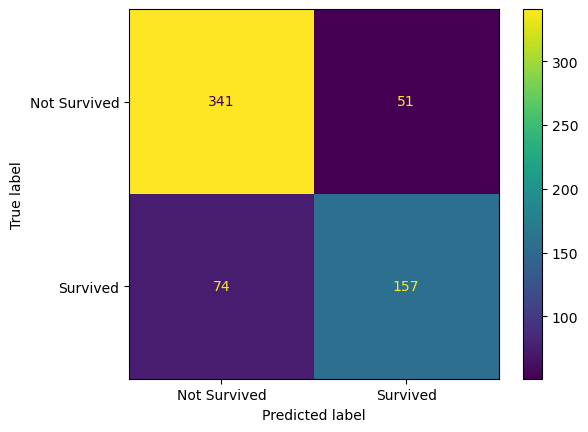

In [14]:
labels = ["Not Survived", "Survived"]
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot();

    In the above Confusion matrix we can observe that the number of `true positives` and number of 
    `true negatives` is higher than number of false positives and false negatives
    - which is a good sign for a good clustering model!!!

## 5. <u> Testing the Model </u>

### Testing the model against the previously taken aside 30% test data (which the model has'nt seen even once)

In [15]:
y_pred_test = knn.predict(X_test)
y_pred_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0])

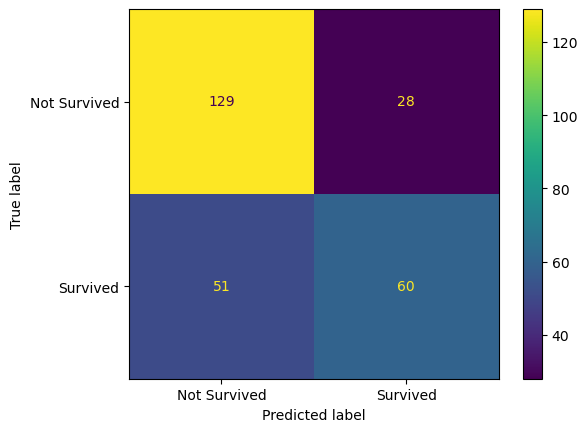

In [16]:
labels = ["Not Survived", "Survived"]
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot();

    In the above Confusion matrix we can observe that the number of `true positives` and number of 
    `true negatives` is higher than number of false positives and false negatives
        - which is a good sign for a good clustering model!!!

-------------------------------------------------------------------------------------------------------------------


## 6. <u> Analysing the model performance using sklearn </u>

In [17]:
accuray = accuracy_score(y_pred_test, y_test)
f1 = f1_score(y_pred_test, y_test, average = "weighted")
print(classification_report(y_pred_test, y_test))
print("Accuracy:", accuray)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       180
           1       0.54      0.68      0.60        88

    accuracy                           0.71       268
   macro avg       0.68      0.70      0.68       268
weighted avg       0.73      0.71      0.71       268

Accuracy: 0.7052238805970149
F1 Score: 0.712199555730733


## Overall, the model tends to perform reasonably well with an accuracy of about 70.5%. However, there might be some class imbalance, as indicated by the difference in support between class 0 (Not Survived) and class 1 (Survived), which could affect the performance metrics.

-------------------------------------------------------------------------------------------------------------------






## ChatGPT 3.5 prompts:

### prompt:  what does the below info say about the model

                  precision    recall  f1-score   support

               0       0.82      0.72      0.77       180
               1       0.54      0.68      0.60        88
    
        accuracy                           0.71       268
       macro avg       0.68      0.70      0.68       268
    weighted avg       0.73      0.71      0.71       268

    Accuracy: 0.7052238805970149
    F1 Score: 0.712199555730733
    
    
### response:

The data you provided seems to be a classification report and evaluation metrics for a machine learning model. Let's break down the key metrics:

1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, the precision is 0.82, which means 82% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.54, indicating 54% of the instances predicted as class 1 are actually class 1.

2. Recall: Recall, also known as sensitivity, is the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, the recall is 0.72, meaning the model correctly identifies 72% of all actual class 0 instances. For class 1, the recall is 0.68, indicating the model correctly identifies 68% of all actual class 1 instances.

3. F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.77, and for class 1, it is 0.60.

4. Support: Support is the number of actual occurrences of the class in the specified dataset. In this case, there are 180 instances of class 0 and 88 instances of class 1.

5. Accuracy: Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. The overall accuracy of the model is approximately 70.5%, indicating that the model correctly predicts the class for about 70.5% of the instances.

6. Macro Average: The macro average is the average of the metrics (precision, recall, F1-score) calculated independently for each class. In this case, the macro average precision, recall, and F1-score are all around 0.68.

7. Weighted Average: The weighted average is the weighted average of the metrics, weighted by the support of each class. It gives more importance to classes with higher support. In this case, the weighted average precision, recall, and F1-score are all around 0.73.

Overall, the model seems to perform reasonably well with an accuracy of about 70.5%. However, there might be some class imbalance, as indicated by the difference in support between class 0 and class 1, which could affect the performance metrics.

[GitHub Repo Link - mshreeram](https://github.com/mshreeram)